In [1]:
import pandas as pd

Load your dataset

In [3]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_transactions.csv to ecommerce_transactions.csv


In [6]:
df = pd.read_csv('ecommerce_transactions.csv')

In [10]:
print(df.head())

   Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       2023-04-14  
1           738.56         PayPal       2023-07-30  
2           178.34    Credit Card       2023-09-17  
3           401.09            UPI       2023-06-21  
4           594.83    Net Banking       2024-10-29  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB
None


predict if a customer will buy?

Then you need a column like Purchase or Label to use as the target.

In [12]:
# Simulate a binary target: 1 if purchase amount > 500, else 0
df['Will_Buy'] = (df['Purchase_Amount'] > 500).astype(int)


Preprocess the data

In [15]:
# Drop missing values
df = df.dropna()

# Convert categorical columns
df = pd.get_dummies(df)

# Split into features and labels
X = df.drop('Will_Buy', axis=1)
y = df['Will_Buy']


Split the dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Choose the model to train

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


Feature Importance with Random Forest

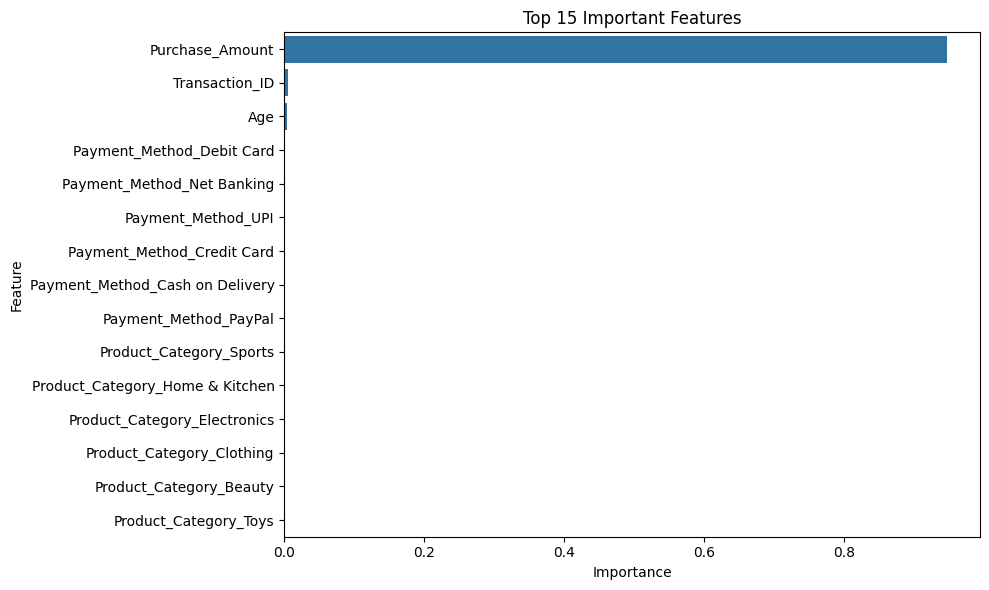

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()
